In [1]:
#loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(10.0,8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from datetime import datetime

In [2]:
import sys
sys.stdout.encoding

'UTF-8'

In [3]:
data=pd.read_csv('Sales Order By Customer-Nov.csv',encoding='latin1',index_col="Sale Date",parse_dates=True)

C:\Users\waqarkhan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (22,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

,S/No,Zone Code,Zone,Region Code,Region,Territory Code,Territory,Distributor,Sector Code,Sector,...,Net Sale Value,Order Status,TP Value,TP Value After Trade Offer,Price After Discount,GST Percent,GST Value,Advance Tax Percent,Advance Tax Value,Invoice Value
Sale Date,,,,,,,,,,,,,,,,,,,,,
2019-01-11 10:01:00,1,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,109,Green Town,...,445.0008,DELIVERED,0.0000,0.0000,0.0000,0,0,0,0,445.0008
2019-01-11 10:12:00,2,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,38,Abid Market,...,445.0008,DELIVERED,445.0008,445.0008,445.0008,0,0,0,0,445.0008
2019-01-11 10:18:00,3,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,161,Angori Scheme,...,890.0016,DELIVERED,0.0000,0.0000,0.0000,0,0,0,0,3649.0016
2019-01-11 10:18:00,4,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,161,Angori Scheme,...,890.0000,DELIVERED,0.0000,0.0000,0.0000,0,0,0,0,3649.0016
2019-01-11 10:18:00,5,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,161,Angori Scheme,...,1520.0000,DELIVERED,0.0000,0.0000,0.0000,0,0,0,0,3649.0016


In [5]:
data.tail()

,S/No,Zone Code,Zone,Region Code,Region,Territory Code,Territory,Distributor,Sector Code,Sector,...,Net Sale Value,Order Status,TP Value,TP Value After Trade Offer,Price After Discount,GST Percent,GST Value,Advance Tax Percent,Advance Tax Value,Invoice Value
Sale Date,,,,,,,,,,,,,,,,,,,,,
2019-07-31 17:28:00,87433,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,164,LHR WS,...,51840.00,DELIVERED,0.0,0.0,0.0,0,0,0,0,130739.88
2019-07-31 17:28:00,87434,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,164,LHR WS,...,44700.00,DELIVERED,0.0,0.0,0.0,0,0,0,0,130739.88
2019-07-31 17:28:00,87435,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,164,LHR WS,...,34199.88,DELIVERED,0.0,0.0,0.0,0,0,0,0,130739.88
2019-07-31 17:29:00,87436,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,164,LHR WS,...,20736.00,DELIVERED,0.0,0.0,0.0,0,0,0,0,65436.00
2019-07-31 17:29:00,87437,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,164,LHR WS,...,44700.00,DELIVERED,0.0,0.0,0.0,0,0,0,0,65436.00


In [6]:
data.isnull().sum() 

S/No                              0
Zone Code                         0
Zone                              0
Region Code                       0
Region                            0
Territory Code                    0
Territory                         0
Distributor                       0
Sector Code                       0
Sector                          840
Town Code                         0
Town                              0
Business Type Code                0
Business Type                     0
Customer Code                     0
Customer Name                     0
Customer CNIC                 37728
Order No                          0
Booker Name                       0
Product Code                      0
Product Name                      0
Item Code                         0
Item Name                         0
Quantity                          0
Item Unit Price                   0
Total Sale Value                  0
Discount                          0
Discount Type               

In [7]:
data.shape

(87437, 38)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87437 entries, 2019-01-11 10:01:00 to 2019-07-31 17:29:00
Data columns (total 38 columns):
S/No                          87437 non-null int64
Zone Code                     87437 non-null int64
Zone                          87437 non-null object
Region Code                   87437 non-null int64
Region                        87437 non-null object
Territory Code                87437 non-null int64
Territory                     87437 non-null object
Distributor                   87437 non-null object
Sector Code                   87437 non-null int64
Sector                        86597 non-null object
Town Code                     87437 non-null int64
Town                          87437 non-null object
Business Type Code            87437 non-null int64
Business Type                 87437 non-null object
Customer Code                 87437 non-null int64
Customer Name                 87437 non-null object
Customer CNIC                 49

In [9]:
data.columns[data.isnull() .any()]

Index(['Sector', 'Customer CNIC'], dtype='object')

In [10]:
data['Item Code']

Sale Date
2019-01-11 10:01:00                  5415
2019-01-11 10:12:00                  5415
2019-01-11 10:18:00                  5415
2019-01-11 10:18:00                  5305
2019-01-11 10:18:00                  5304
                              ...        
2019-07-31 17:28:00    5415.00001.000.000
2019-07-31 17:28:00    5304.00002.000.000
2019-07-31 17:28:00    5421.00015.000.000
2019-07-31 17:29:00    5415.00001.000.000
2019-07-31 17:29:00    5304.00002.000.000
Name: Item Code, Length: 87437, dtype: object

In [11]:
data.groupby('Item Name').Quantity.sum()

Item Name
7 DAYS (6)(Unit)                     94980
B.G.-Proactive (R)(Unit)                 0
BG Family-W STD(Unit)                   30
CSR(Unit)                             1009
Falcon                              143700
                                    ...   
Trig Salon(Unit)                         0
Trig-II Premium(Unit)                 1332
Trim D/E Salon                      120000
Trim D/E(Unit)                       38000
Trim-II XL Card (Regular)(Unit)    1504412
Name: Quantity, Length: 61, dtype: int64

In [12]:
data[data['Item Name']=='Swift-II H+6CT(Unit)']

,S/No,Zone Code,Zone,Region Code,Region,Territory Code,Territory,Distributor,Sector Code,Sector,...,Net Sale Value,Order Status,TP Value,TP Value After Trade Offer,Price After Discount,GST Percent,GST Value,Advance Tax Percent,Advance Tax Value,Invoice Value
Sale Date,,,,,,,,,,,,,,,,,,,,,
2019-02-11 10:30:00,1035,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,32,Qila Muhammadi,...,280.0,DELIVERED,280.0,280.0,280.0,0,0,0,0,280.0000
2019-11-14 18:45:00,9155,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,111,Hassan Basari Road,...,420.0,DELIVERED,420.0,420.0,420.0,0,0,0,0,2051.0000
2019-11-15 17:54:00,9976,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,111,Hassan Basari Road,...,700.0,DELIVERED,0.0,0.0,0.0,0,0,0,0,21986.0376
2019-11-19 12:37:00,12016,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,6,Mansoora,...,140.0,DELIVERED,0.0,0.0,0.0,0,0,0,0,606.0000
2019-11-19 14:47:00,12102,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,93,Saddar-B,...,280.0,DELIVERED,0.0,0.0,0.0,0,0,0,0,280.0000
2019-11-23 14:56:00,15059,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,48,Walton,...,420.0,DELIVERED,420.0,420.0,420.0,0,0,0,0,1291.0008
2019-11-25 16:09:00,16838,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,110,Haider Road,...,420.0,DELIVERED,0.0,0.0,0.0,0,0,0,0,3081.0000
2019-11-27 17:24:00,18158,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,10,Sabza Zar-B,...,840.0,DELIVERED,0.0,0.0,0.0,0,0,0,0,19162.3744
2019-03-10 11:06:00,22178,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,123,Shadman,...,280.0,DELIVERED,0.0,0.0,0.0,0,0,0,0,1096.0000


In [13]:
data['Item Name'].value_counts()

THR 48(Unit)                       16189
Trim-II XL Card (Regular)(Unit)    13053
TPS-10 (Unit)                      10725
TDS (10)(Unit)                      9175
TRBC (Unit) CP                      8942
                                   ...  
TPS-TOWER                              1
B.G.-Proactive (R)(Unit)               1
T. Jax(Unit)                           1
Hero Safety (TRBC-192)                 1
NEW STEEL Card (Unit)                  1
Name: Item Name, Length: 61, dtype: int64

In [14]:
pd.get_option('display.max_columns')

20

In [15]:
pd.reset_option('display.max_columns')

In [16]:
#data.head()

In [17]:
data.index

DatetimeIndex(['2019-01-11 10:01:00', '2019-01-11 10:12:00',
               '2019-01-11 10:18:00', '2019-01-11 10:18:00',
               '2019-01-11 10:18:00', '2019-01-11 10:18:00',
               '2019-01-11 10:18:00', '2019-01-11 10:18:00',
               '2019-01-11 10:18:00', '2019-01-11 10:30:00',
               ...
               '2019-07-31 17:26:00', '2019-07-31 17:27:00',
               '2019-07-31 17:27:00', '2019-07-31 17:27:00',
               '2019-07-31 17:27:00', '2019-07-31 17:28:00',
               '2019-07-31 17:28:00', '2019-07-31 17:28:00',
               '2019-07-31 17:29:00', '2019-07-31 17:29:00'],
              dtype='datetime64[ns]', name='Sale Date', length=87437, freq=None)

In [18]:
sorted(data['Item Name'].unique())

['7 DAYS (6)(Unit)',
 'B.G.-Proactive (R)(Unit)',
 'BG Family-W STD(Unit)',
 'CSR(Unit)',
 'Falcon',
 'Femina 1s Pouch (Unit)',
 'Femina 5s Pouch(Unit)',
 'Fresh White STD(Unit)',
 'Hercules S/R(Unit)',
 'Hero Safety (TRBC)unit',
 'Hero Safety (TRBC-192)',
 'KING (10)(Unit)',
 'NEW EDGE(Unit)',
 'NEW STEEL (Salon) W(Unit)',
 'NEW STEEL Card (Unit)',
 'RAZER-3',
 'Raze-II Card(Unit)',
 'Razor-II(Unit)',
 'STARKE LUBE D/R 48S(CARD)',
 'Saba Bath (P) 105gm',
 'Saba Bath (W) 105gm',
 'Saba Std. (P) 70gm',
 'Saba Std. (W) 70gm',
 'Safex Salon Razor(Unit)',
 'Shavor 5 Pouch(Unit)',
 'Stark Ultra',
 'Starke Premium',
 'Super Safex Salon',
 'Swift-II Cart. (5)(Unit)',
 'Swift-II H+6CT(Unit)',
 'T. Jax(Unit)',
 'TDS (10)(Unit)',
 'TEC-II Samurai(Unit)',
 'TEC-II(Unit)',
 'THR (24)(Unit)',
 'THR 48(Unit)',
 'TPS-10 (Unit)',
 'TPS-SALON',
 'TPS-TOWER',
 'TRBC (Salon) CP',
 'TRBC (Salon)(Unit)',
 'TRBC (Unit) CP',
 'TRBC(Unit)',
 'TREET Classic (10)(Unit)',
 'TREET-1 PLATINUM',
 'TSL(11)(Unit)',
 

In [19]:
df= data.groupby('Item Name').Quantity.Sector

AttributeError: 'SeriesGroupBy' object has no attribute 'Sector'

In [20]:
df= data.pivot_table(values='Quantity',index='Item Name',columns='Sale Date')
df
#by default mean is default agg function in pivot table

Sale Date,2019-01-07 10:02:00,2019-01-07 10:03:00,2019-01-07 10:04:00,2019-01-07 10:06:00,2019-01-07 10:07:00,2019-01-07 10:13:00,2019-01-07 10:19:00,2019-01-07 10:20:00,2019-01-07 10:21:00,2019-01-07 10:22:00,...,2019-12-11 17:57:00,2019-12-11 17:58:00,2019-12-11 17:59:00,2019-12-11 18:00:00,2019-12-11 18:01:00,2019-12-11 18:03:00,2019-12-11 18:04:00,2019-12-11 18:06:00,2019-12-11 19:07:00,2019-12-11 19:35:00
Item Name,,,,,,,,,,,,,,,,,,,,,
7 DAYS (6)(Unit),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B.G.-Proactive (R)(Unit),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BG Family-W STD(Unit),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSR(Unit),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Falcon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trig Salon(Unit),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trig-II Premium(Unit),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trim D/E Salon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
adc= data.pivot_table(values='',index='Symbol',columns='Date')

KeyError: ''

In [22]:
data.head()

,S/No,Zone Code,Zone,Region Code,Region,Territory Code,Territory,Distributor,Sector Code,Sector,...,Net Sale Value,Order Status,TP Value,TP Value After Trade Offer,Price After Discount,GST Percent,GST Value,Advance Tax Percent,Advance Tax Value,Invoice Value
Sale Date,,,,,,,,,,,,,,,,,,,,,
2019-01-11 10:01:00,1,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,109,Green Town,...,445.0008,DELIVERED,0.0000,0.0000,0.0000,0,0,0,0,445.0008
2019-01-11 10:12:00,2,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,38,Abid Market,...,445.0008,DELIVERED,445.0008,445.0008,445.0008,0,0,0,0,445.0008
2019-01-11 10:18:00,3,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,161,Angori Scheme,...,890.0016,DELIVERED,0.0000,0.0000,0.0000,0,0,0,0,3649.0016
2019-01-11 10:18:00,4,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,161,Angori Scheme,...,890.0000,DELIVERED,0.0000,0.0000,0.0000,0,0,0,0,3649.0016
2019-01-11 10:18:00,5,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,161,Angori Scheme,...,1520.0000,DELIVERED,0.0000,0.0000,0.0000,0,0,0,0,3649.0016


In [23]:
ad=data['Sale Date','Item Name','Quantity']

KeyError: ('Sale Date', 'Item Name', 'Quantity')

In [24]:
data.head()

,S/No,Zone Code,Zone,Region Code,Region,Territory Code,Territory,Distributor,Sector Code,Sector,...,Net Sale Value,Order Status,TP Value,TP Value After Trade Offer,Price After Discount,GST Percent,GST Value,Advance Tax Percent,Advance Tax Value,Invoice Value
Sale Date,,,,,,,,,,,,,,,,,,,,,
2019-01-11 10:01:00,1,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,109,Green Town,...,445.0008,DELIVERED,0.0000,0.0000,0.0000,0,0,0,0,445.0008
2019-01-11 10:12:00,2,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,38,Abid Market,...,445.0008,DELIVERED,445.0008,445.0008,445.0008,0,0,0,0,445.0008
2019-01-11 10:18:00,3,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,161,Angori Scheme,...,890.0016,DELIVERED,0.0000,0.0000,0.0000,0,0,0,0,3649.0016
2019-01-11 10:18:00,4,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,161,Angori Scheme,...,890.0000,DELIVERED,0.0000,0.0000,0.0000,0,0,0,0,3649.0016
2019-01-11 10:18:00,5,8,Lahore,13,Lahore,17,Lahore A,Elite Brands Ltd,161,Angori Scheme,...,1520.0000,DELIVERED,0.0000,0.0000,0.0000,0,0,0,0,3649.0016


In [25]:
ali=data[['Item Name', 'Quantity','Sector']]
ali.head()

,Item Name,Quantity,Sector
Sale Date,,,
2019-01-11 10:01:00,Trim-II XL Card (Regular)(Unit),24,Green Town
2019-01-11 10:12:00,Trim-II XL Card (Regular)(Unit),24,Abid Market
2019-01-11 10:18:00,Trim-II XL Card (Regular)(Unit),48,Angori Scheme
2019-01-11 10:18:00,TPS-10 (Unit),200,Angori Scheme
2019-01-11 10:18:00,TDS (10)(Unit),400,Angori Scheme


In [26]:
ali.resample('M').mean()
grouped = ali.groupby(['Item Name', pd.Grouper(freq='M')])['Quantity'].count()

In [27]:
grouped.head()

Item Name         Sale Date 
7 DAYS (6)(Unit)  2019-01-31     1
                  2019-02-28     9
                  2019-03-31     5
                  2019-04-30     7
                  2019-05-31    10
Name: Quantity, dtype: int64

In [28]:
grouped = data.groupby('Item Name').resample('M')['Quantity'].sum()

In [29]:
grouped


Item Name                        Sale Date 
7 DAYS (6)(Unit)                 2019-01-31       120
                                 2019-02-28     14160
                                 2019-03-31       240
                                 2019-04-30       240
                                 2019-05-31       840
                                                ...  
Trim-II XL Card (Regular)(Unit)  2019-08-31    157319
                                 2019-09-30    427237
                                 2019-10-31    269371
                                 2019-11-30     87387
                                 2019-12-31     53556
Name: Quantity, Length: 617, dtype: int64

In [30]:
grouped['Trim D/E Salon']

Sale Date
2019-02-28    10000
2019-03-31        0
2019-04-30        0
2019-05-31        0
2019-06-30        0
2019-07-31    50000
2019-08-31        0
2019-09-30    20000
2019-10-31    20000
2019-11-30    20000
Name: Quantity, dtype: int64

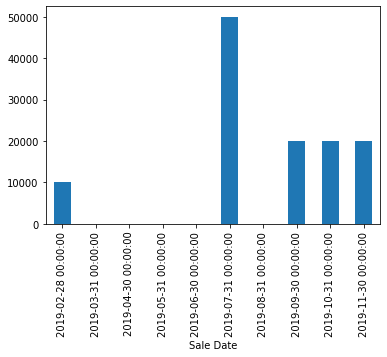

In [31]:
grouped['Trim D/E Salon'].plot(kind='bar')

sales in nov oct dec is almost the same...before this sudden rise in july..not entered in month of august....
on the basis on the three months we can only predict..and it is absolutely same..so we can say if it is correctly entered that in jan
it will remain the same or around 20 thousand.if all other things remains the same..like marketing strategies and so on..


In [32]:
grouped['TPS-10 (Unit)']

Sale Date
2019-01-31     132800
2019-02-28     735200
2019-03-31     158000
2019-04-30      56900
2019-05-31      57000
2019-06-30     710800
2019-07-31    1945200
2019-08-31    2644600
2019-09-30    2286193
2019-10-31    1040500
2019-11-30    1755510
2019-12-31     253000
Name: Quantity, dtype: int64

In [33]:
grouped['B.G.-Proactive (R)(Unit)']

Sale Date
2019-05-31    0
Name: Quantity, dtype: int64

In [34]:
grouped['BG Family-W STD(Unit)']

Sale Date
2019-02-28     6
2019-03-31     0
2019-04-30     0
2019-05-31     0
2019-06-30     0
2019-07-31     0
2019-08-31    24
Name: Quantity, dtype: int64

In [35]:
grouped['CSR(Unit)']

Sale Date
2019-01-31      4
2019-02-28     75
2019-03-31      4
2019-04-30     18
2019-05-31      7
2019-06-30      0
2019-07-31    305
2019-08-31    114
2019-09-30    188
2019-10-31     91
2019-11-30    178
2019-12-31     25
Name: Quantity, dtype: int64

In [36]:
grouped['CSR(Unit)'].sum() #to verify against the total quantity.

1009

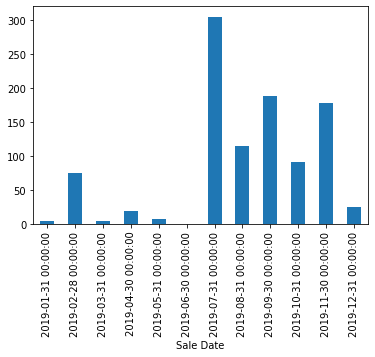

In [37]:
grouped['CSR(Unit)'].plot(kind='bar',x='Sale Date', y='Quantity')

#Question
What is csr unit?
Why is selling quantities varies alot.?
is it because data entry issue
or because of seasonality..like(events like eid,ramzan..)
at the end we will see its sales in sectors..

In [38]:
grouped['Trim-II XL Card (Regular)(Unit)']

Sale Date
2019-01-31     33972
2019-02-28    159872
2019-03-31     17088
2019-04-30      4104
2019-05-31     24924
2019-06-30      4416
2019-07-31    265166
2019-08-31    157319
2019-09-30    427237
2019-10-31    269371
2019-11-30     87387
2019-12-31     53556
Name: Quantity, dtype: int64

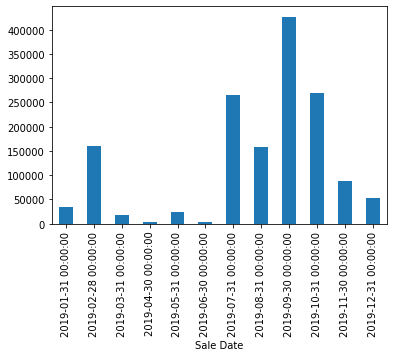

In [39]:
grouped['Trim-II XL Card (Regular)(Unit)'].plot(kind='bar')

Question:-
    product detail?
    personal opinion..the sale record is not good enough for prediction..specially before august....
    it is also not normal at the end of the year..if we have last year data we can verify it..

In [40]:
grouped['Saba Bath (W) 105gm']

Sale Date
2019-01-31     7998
2019-02-28    45378
2019-03-31    61422
2019-04-30     1458
2019-05-31     2244
2019-06-30      762
2019-07-31    53536
2019-08-31    87693
2019-09-30    50788
2019-10-31    84177
2019-11-30    66552
2019-12-31     9486
Name: Quantity, dtype: int64

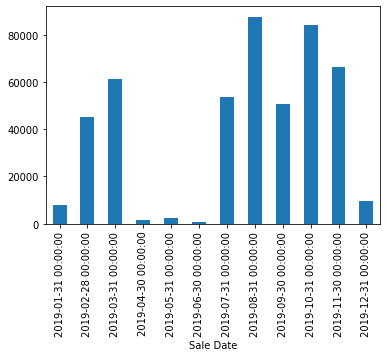

In [41]:
grouped['Saba Bath (W) 105gm'].plot(kind='bar')

again data is biased before august..and also a lot decrease is in the month of dec..it can also be the reason that in cold log kam nahaty hain...:) 

In [42]:
grouped['TRBC(Unit)']

Sale Date
2019-01-31     38700
2019-02-28     58510
2019-03-31      1220
2019-04-30      1940
2019-05-31      1200
2019-06-30       200
2019-07-31      1520
2019-08-31       960
2019-09-30     10660
2019-10-31    268400
2019-11-30         0
2019-12-31         0
Name: Quantity, dtype: int64

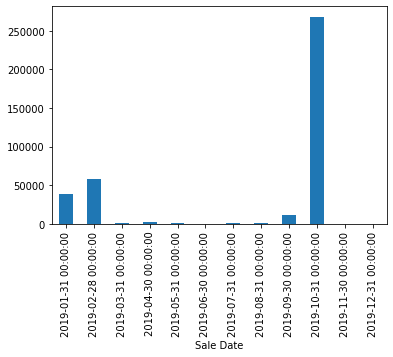

In [43]:
grouped['TRBC(Unit)'].plot(kind='bar')

first quest what is TRBC?? ..if it is product ppl use irregularly..if not the data is not good enough to predict...main question always be the product detail to make further analysis

In [44]:
grouped['Saba Std. (W) 70gm']

Sale Date
2019-01-31     9612
2019-02-28     8147
2019-03-31     1614
2019-04-30     3246
2019-05-31     2304
2019-06-30      843
2019-07-31    32169
2019-08-31    38097
2019-09-30    39993
2019-10-31    16149
2019-11-30    48864
2019-12-31     8100
Name: Quantity, dtype: int64

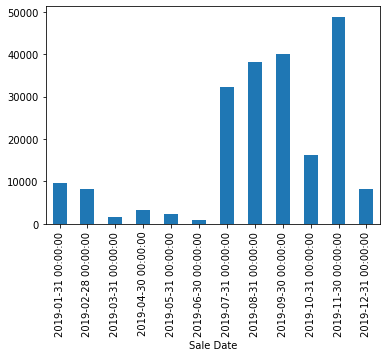

In [45]:
grouped['Saba Std. (W) 70gm'].plot(kind='bar')

not good for prediction before august..but it is comparable with it other varian of 105 gm mentioned above..

In [46]:
grouped['TPS-10 (Unit)']

Sale Date
2019-01-31     132800
2019-02-28     735200
2019-03-31     158000
2019-04-30      56900
2019-05-31      57000
2019-06-30     710800
2019-07-31    1945200
2019-08-31    2644600
2019-09-30    2286193
2019-10-31    1040500
2019-11-30    1755510
2019-12-31     253000
Name: Quantity, dtype: int64

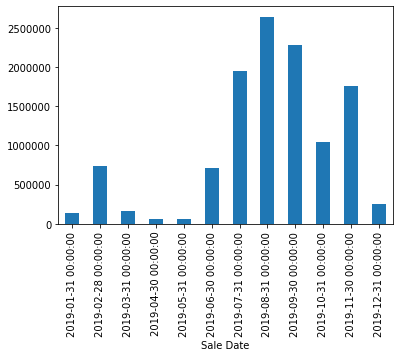

In [47]:
grouped['TPS-10 (Unit)'].plot(kind='bar')

# point to ponder??

the graph mentioned above of different product shows that in december sale quantity decreases...?? isnt it because of lack of entries in december???

same question
what is tps?? ..data good for prediction is after august.....and also check the main point why all products quantity decreasing in december?

In [48]:
grouped['THR 48(Unit)']

Sale Date
2019-03-31        48
2019-04-30      4002
2019-05-31    119568
2019-06-30     94679
2019-07-31    287176
2019-08-31    460596
2019-09-30    497566
2019-10-31    533552
2019-11-30    604771
2019-12-31    279284
Name: Quantity, dtype: int64

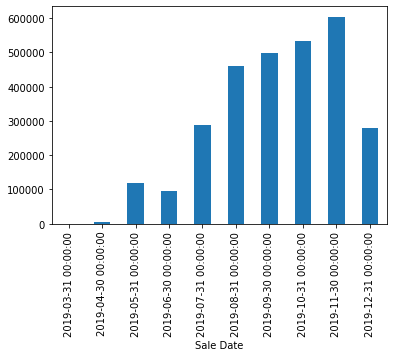

In [49]:
grouped['THR 48(Unit)'].plot(kind='bar')

question??
nature of products...increasing positively after august..but like other products decreased in december

In [50]:
grouped['RAZER-3']

Sale Date
2019-01-31     50
2019-02-28     50
2019-03-31      0
2019-04-30      0
2019-05-31     30
2019-06-30     80
2019-07-31     90
2019-08-31     10
2019-09-30     80
2019-10-31    300
2019-11-30    700
2019-12-31     20
Name: Quantity, dtype: int64

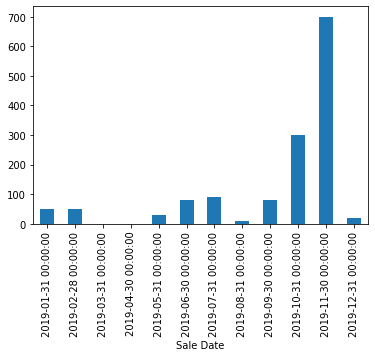

In [51]:
grouped['RAZER-3'].plot(kind='bar')

question??
is it treet product ?like other razor mentioned above..if it is..then it is suddenly increased in oct nov(maybe because of some sort bachat offer...? can be onfe of reason..)
and have sudden dip in dec like other? 
data is not really smooth to predict..further analysis can be made on the basis of sectors wise sale
